In [ ]:
# TASK 1 : Sales Prediction
# Bactch : Aug 
# Domain : Data Science 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [24]:
import os 
os.chdir("C:\\Users\\Admin\\OneDrive\\Documents\\dataset")

In [26]:
df = pd.read_csv('sales.csv')
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [28]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [30]:
# Check for missing values
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


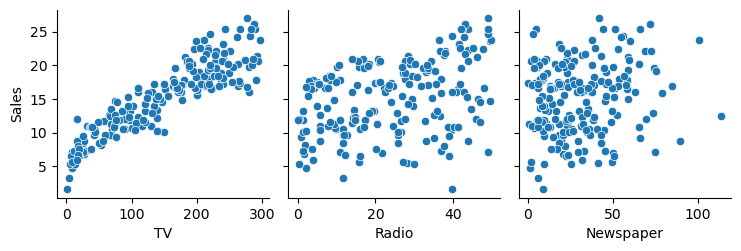

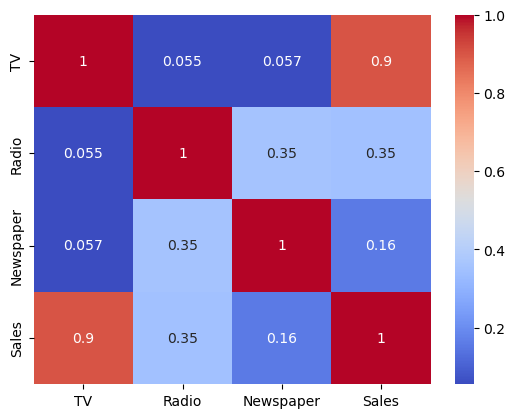

In [36]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [40]:
X = df.drop("Sales", axis=1)   
y = df["Sales"]                

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [50]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# Convert to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                        MSE        R2
Linear Regression  2.907757  0.905901
Decision Tree      3.402000  0.889907
Random Forest      1.437433  0.953483
Gradient Boosting  1.255261  0.959378
XGBoost            1.316346  0.957401


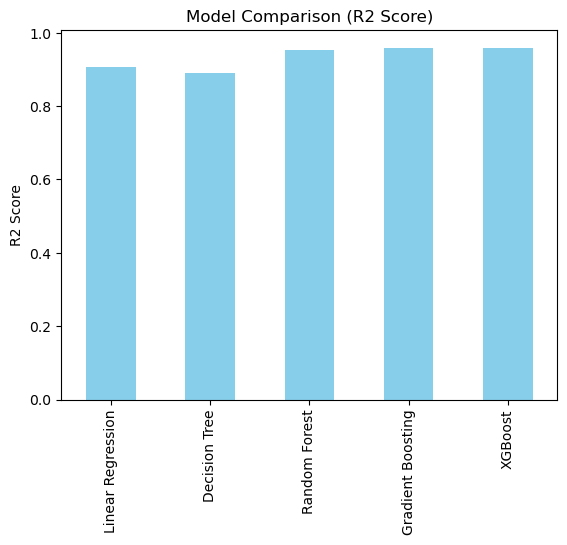

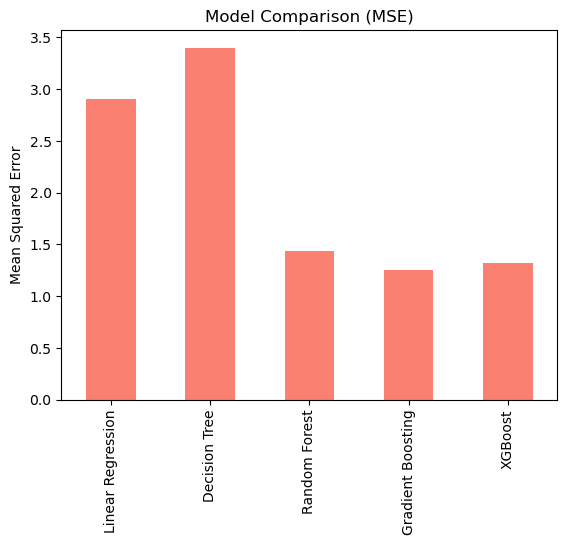

In [52]:
# Plot R2 Scores
results_df["R2"].plot(kind="bar", color="skyblue", title="Model Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.show()

# Plot MSE
results_df["MSE"].plot(kind="bar", color="salmon", title="Model Comparison (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()

In [54]:
import numpy as np

# Predict on training data itself (for comparison)
y_pred_all = model.predict(X)

results = pd.DataFrame({
    "TV": X["TV"],
    "Radio": X["Radio"],
    "Actual Sales": y,
    "Predicted Sales": np.round(y_pred_all, 2)
})

print("\nComparison:\n", results)


Comparison:
         TV  Radio  Actual Sales  Predicted Sales
0    230.1   37.8          22.1        22.080000
1     44.5   39.3          10.4        10.540000
2     17.2   45.9          12.0        11.890000
3    151.5   41.3          16.5        16.620001
4    180.8   10.8          17.9        17.889999
..     ...    ...           ...              ...
195   38.2    3.7           7.6         7.600000
196   94.2    4.9          14.0        13.990000
197  177.0    9.3          14.8        14.910000
198  283.6   42.0          25.5        25.580000
199  232.1    8.6          18.4        18.370001

[200 rows x 4 columns]


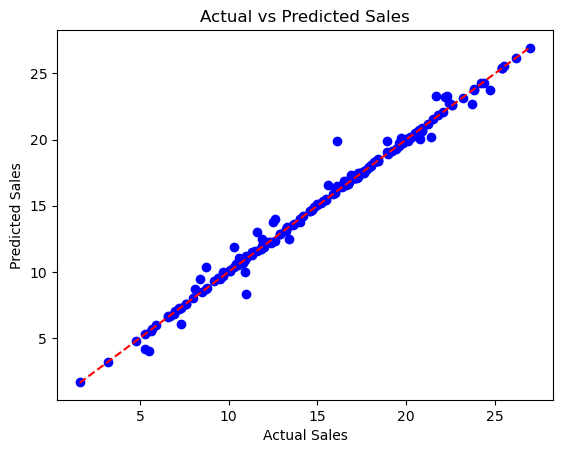

In [56]:
plt.scatter(y, y_pred_all, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [72]:
# Save all models in a dict
joblib.dump(models, "all_models.pkl")

# Load them back
loaded_models = joblib.load("all_models.pkl")

# Use Linear Regression from the dict
test_data = pd.DataFrame({"TV": [150], "Radio": [15], "Newspaper":[45]})
print("Decision Tree Prediction:", loaded_models["Decision Tree"].predict(test_data))

Decision Tree Prediction: [10.1]
